# Correlating Voice Features with EEG Data

## Selected Voice Features

After analyzing the given voice features, the following three features seem to be the most promising for correlating with EEG data:

1. **MFCC (Mel-frequency cepstral coefficients)**: MFCCs are widely used in speech processing and represent the short-term power spectrum of a sound. They capture the vocal tract shape, which is related to the way we produce sounds. MFCCs are particularly useful for correlating with EEG data because they reflect both the physical and cognitive processes of speech production, which can be linked to brain activity.

2. **f0 mean (Fundamental frequency mean)**: The fundamental frequency is the lowest frequency in a harmonic series and is directly related to the perceived pitch of a sound. f0 mean represents the average fundamental frequency of the voice signal. As the pitch is associated with emotions and cognitive processes, it can be a valuable feature for correlating with EEG data.

3. **Speech Rate**: The speech rate is the number of syllables or words spoken per unit of time. It is an important feature of the prosody of speech and is influenced by cognitive processes, emotions, and arousal levels. Since these factors are also reflected in EEG data, the speech rate may be a useful feature for correlation.

## Rationale for Choosing These Features

The chosen features (MFCC, f0 mean, and Speech Rate) provide a combination of spectral, prosodic, and temporal information about the voice signal. These features capture different aspects of speech production, which are related to both the physical act of speaking and the cognitive processes underlying it. By focusing on these features, we aim to maximize the chances of finding meaningful correlations between voice and EEG data.

Now, let's proceed with the Python code for applying these filters to the voice data.



/var/folders/1y/y0cjlqgn00jfgh7_fn17pwf80000gn/T/ipykernel_60599/991135040.py:14: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(signal), ref=np.max), sr=sample_rate, x_axis='time', y_axis='log')


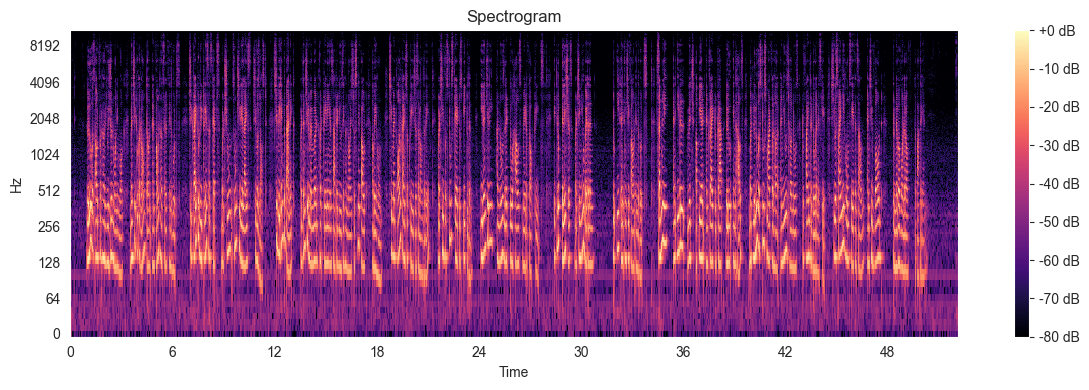

In [1]:
# Importing required libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

# Load the voice data
file_path = 'prasannjeet.mp3'
signal, sample_rate = librosa.load(file_path)

# Plot the spectrogram of the original voice data
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(signal), ref=np.max), sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

MFCC:
[[-6.2429510e+02 -5.5509100e+02 -5.0636673e+02 ... -4.6379123e+02
  -5.1335553e+02 -5.5311029e+02]
 [ 0.0000000e+00  7.5091614e+01  9.8721077e+01 ...  4.3053810e+01
   7.7360771e+01  7.2587273e+01]
 [ 0.0000000e+00  3.3164139e+01  2.5751974e+01 ...  5.2609192e+01
   4.7483276e+01  4.4607193e+01]
 ...
 [ 0.0000000e+00  3.2092037e+00  3.4022949e+00 ...  8.2853532e-01
  -3.5737236e+00 -2.1486506e+00]
 [ 0.0000000e+00  4.5479851e+00  2.9954710e+00 ...  5.6407042e+00
   8.4441462e+00  5.4840040e+00]
 [ 0.0000000e+00  7.1188059e+00  7.6238132e+00 ...  3.6527944e-01
   2.6033409e+00  7.8316803e+00]]

f0 mean: 1113.6351318359375

Speech Rate: 2.0513803680981595 beats per second



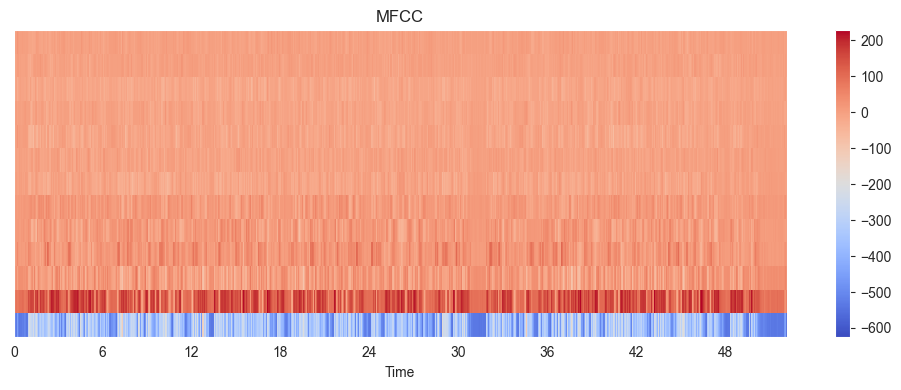

In [4]:

# Calculate MFCC
mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13)

# Calculate f0 mean (pitch)
pitches, magnitudes = librosa.piptrack(y=signal, sr=sample_rate)
f0_mean = np.mean(pitches[np.nonzero(pitches)])

# Calculate speech rate
hop_length = 512
tempo, beat_frames = librosa.beat.beat_track(y=signal, sr=sample_rate, hop_length=hop_length)
speech_rate = len(beat_frames) / librosa.get_duration(y=signal)

# Print calculated features
print(f"MFCC:\n{mfcc}\n")
print(f"f0 mean: {f0_mean}\n")
print(f"Speech Rate: {speech_rate} beats per second\n")

# Visualizing the MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sample_rate)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In this Jupyter Notebook, we have loaded the voice data, visualized the spectrogram of the original voice data, and calculated the MFCC, f0 mean, and speech rate features. We have also visualized the MFCC feature as a separate plot.

Now that we have extracted the selected features from the voice data, we can proceed with correlating these features with the EEG data. The EEG data preprocessing and correlation analysis are not covered in this notebook, but these voice features can be used as input for further analysis alongside the EEG data.